In [1]:
import csv
import numpy as np
import re
import string
import nltk
from matplotlib import pyplot as plt

## Logistic Regression Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## StratifiedKFold

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

## Word2vec

In [18]:
from gensim.models import Word2Vec
import spacy
nlp = spacy.load('en_core_web_sm')

## Vector Space Models

In [32]:
text_list = []
with open('will_play_text.csv') as f:
    reader = csv.reader(f,delimiter=';')
    for line in reader:
        text_list.append(line)

In [33]:
play_names = []
with open('play_names.txt') as f:
    for line in f:
        play_names.append(line.strip())
print("Number of plays: {}".format(len(play_names)))

Number of plays: 36


In [34]:
vocab = []
with open('vocab.txt') as f:
    for line in f:
        vocab.append(line.strip())

In [35]:
word_to_index = {word : i for i, word in enumerate(vocab)}
index_to_word = [word for i, word in enumerate(word_to_index)]

In [36]:
play_to_text = {}
for data in text_list:
    name = data[1]
    talk = data[5]
    if name in play_names:
        if name not in play_to_text:
            play_to_text[name] = []
            play_to_text[name].append(talk)
        else:
            play_to_text[name].append(talk)

In [37]:
play_text = []
play_names = []
for k,v in play_to_text.items():
    play_text.append(' '.join(v))
    play_names.append(k)

## CountVectorizer PCA

In [79]:
from sklearn.decomposition import PCA

In [80]:
vectorizer = CountVectorizer(stop_words="english", vocabulary = vocab)
vectorizer.fit(play_text)
term_doc = vectorizer.transform(play_text)
print(term_doc.shape)

(36, 22602)


In [81]:
pca = PCA(n_components=2)
term_doc_pca = pca.fit_transform(term_doc.toarray())

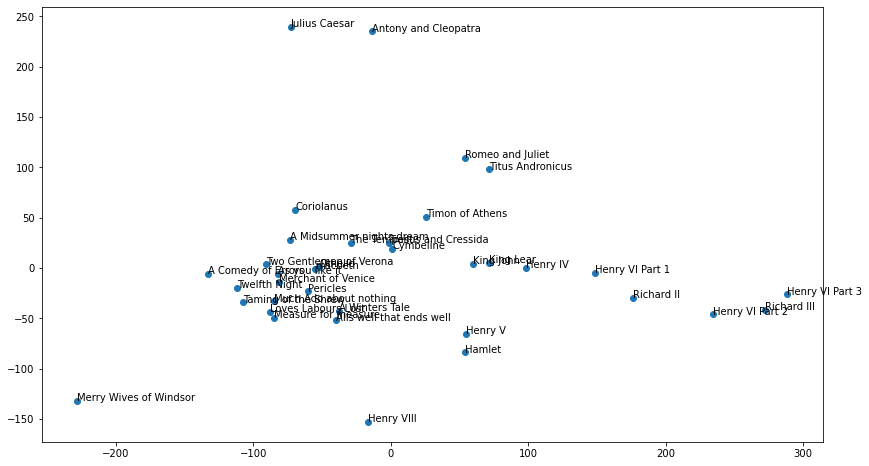

In [82]:
plt.figure(figsize=(14,8))
plt.scatter(term_doc_pca[:, 0], term_doc_pca[:, 1])
for i, name in enumerate(play_names):
    plt.annotate(name, xy=(term_doc_pca[i, 0], term_doc_pca[i, 1]))
plt.savefig("plays_countVec.png")
plt.show()

## TfidfVectorizer PCA

In [83]:
vectorizer = TfidfVectorizer(stop_words="english", vocabulary = vocab)
vectorizer.fit(play_text)
term_doc = vectorizer.transform(play_text)
print(term_doc.shape)

(36, 22602)


In [84]:
pca = PCA(n_components=2)
term_doc_pca = pca.fit_transform(term_doc.toarray())

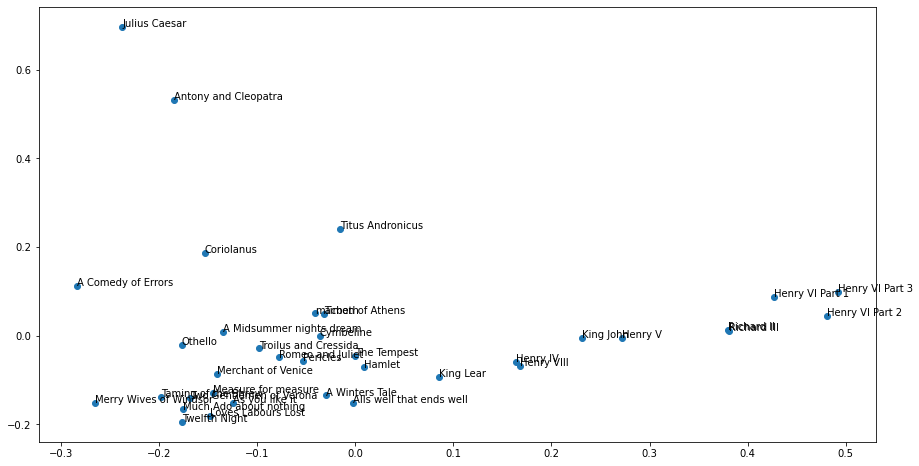

In [85]:
plt.figure(figsize=(15,8))
plt.scatter(term_doc_pca[:, 0], term_doc_pca[:, 1])
for i, name in enumerate(play_names):
    plt.annotate(name, xy=(term_doc_pca[i, 0], term_doc_pca[i, 1]))
plt.savefig("plays_tfidfVec.png")
plt.show()

## Word-Word Matrix

In [45]:
line_text = []
for i, data in enumerate(text_list[:]):
    talk = data[5].lower()
    line_text.append(talk)

In [46]:
vectorizer = CountVectorizer(stop_words="english", vocabulary = vocab)
term_doc = vectorizer.fit_transform(line_text)
print(term_doc.shape)

(111396, 22602)


In [75]:
word_word = (term_doc.T * term_doc)
word_word.setdiag(0)
word_word_matrix = word_word.toarray()
print(word_word_matrix.shape)

In [48]:
word_to_vector = {}
for i in range(word_word_matrix.shape[0]):
    word_to_vector[index_to_word[i]] = word_word_matrix[i]

## Plays Cosine Similarity

In [74]:
play_vectors = {}
for name, text in play_to_text.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in word_to_index:
            word_vectors.append(word_to_vector[word])
    play_vectors[name] = np.mean(word_vectors, axis=0)

In [50]:
comedies = [
            "The Tempest",
            "Two Gentlemen of Verona",
            "Merry Wives of Windsor",
            "Measure for measure",
            "A Comedy of Errors",
            "Much Ado about nothing",
            "Loves Labours Lost",
            "A Midsummer nights dream",
            "Merchant of Venice",
            "As you like it",
            "Taming of the Shrew",
            "Alls well that ends well",
            "Twelfth Night",
            "A Winters Tale",
            "Pericles"
            ]

In [51]:
histories = [
            "King John",
            "Richard II",
            "Henry IV",
            "Henry V",
            "Henry VI Part 1",
            "Henry VI Part 2",
            "Henry VI Part 3",
            "Richard III",
            "Henry VIII",
            ]

In [52]:
tragedies = [
        "Troilus and Cressida",
        "Coriolanus",
        "Titus Andronicus",
        "Romeo and Juliet",
        "Timon of Athens",
        "Julius Caesar",
        "macbeth",
        "Hamlet",
        "King Lear",
        "Othello",
        "Antony and Cleopatra",
        "Cymbeline",
]

In [53]:
def cos_sim(a, b):
    x = np.sum(np.array(a) * np.array(b), axis=0)
    y = np.linalg.norm(a) * np.linalg.norm(b)
    return x / y

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
from itertools import combinations

In [56]:
comedies_paris = list(combinations(comedies, 2))
comedies_sim = []
for (a, b) in comedies_paris:
    v1 = play_vectors[a]
    v2 = play_vectors[b]
    comedies_sim.append(cos_sim(v1, v2))
print("Comedies Cosine Similarity: {}".format(np.mean(comedies_sim)))

Comedies Cosine Similarity: 0.989722889204023


In [57]:
histories_paris = list(combinations(histories, 2))
histories_sim = []
for (a, b) in histories_paris:
    v1 = play_vectors[a]
    v2 = play_vectors[b]
    histories_sim.append(cos_sim(v1, v2))
print("histories Cosine Similarity: {}".format(np.mean(histories_sim)))

histories Cosine Similarity: 0.9826865350568943


In [58]:
tragedies_paris = list(combinations(tragedies, 2))
tragedies_sim = []
for (a, b) in tragedies_paris:
    v1 = play_vectors[a]
    v2 = play_vectors[b]
    tragedies_sim.append(cos_sim(v1, v2))
print("tragedies Cosine Similarity: {}".format(np.mean(tragedies_sim)))

tragedies Cosine Similarity: 0.9925193923005569


### use word2vec

In [59]:
train_data = tokenize(train_text, remove_stop=False)
model = Word2Vec(sentences=train_data, size=100, window=5, min_count=1)

In [60]:
## weight vector
# def word_weight(word):
#     weight = 1e-3/(1e-3+word_uniprob[word])
#     return weight

In [61]:
# corpus = []
# for text in play_text[:]:
#     corpus.extend(text.lower().split())

# word_uniprob = {}
# len_corpus = len(corpus)
# n = 1
# for word in model.wv.vocab:
#     word_uniprob[word] = corpus.count(word)/len_corpus
#     n += 1
#     if n % 10000 == 0:
#         print(n)

In [73]:
play_vectors_word2vec = {}
for name, text in play_to_text.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in model.wv.vocab:
            word_vectors.append(model.wv[word])
    play_vectors_word2vec[name] = np.mean(word_vectors, axis=0)

In [63]:
comedies_paris = list(combinations(comedies, 2))
comedies_sim = []
for (a, b) in comedies_paris:
    v1 = play_vectors_word2vec[a]
    v2 = play_vectors_word2vec[b]
    comedies_sim.append(cos_sim(v1, v2))
print("Comedies Cosine Similarity: {}".format(np.mean(comedies_sim)))

Comedies Cosine Similarity: 0.998374342918396


In [64]:
histories_paris = list(combinations(histories, 2))
histories_sim = []
for (a, b) in histories_paris:
    v1 = play_vectors_word2vec[a]
    v2 = play_vectors_word2vec[b]
    histories_sim.append(cos_sim(v1, v2))
print("histories Cosine Similarity: {}".format(np.mean(histories_sim)))

histories Cosine Similarity: 0.9988400936126709


In [65]:
tragedies_paris = list(combinations(tragedies, 2))
tragedies_sim = []
for (a, b) in tragedies_paris:
    v1 = play_vectors_word2vec[a]
    v2 = play_vectors_word2vec[b]
    tragedies_sim.append(cos_sim(v1, v2))
print("tragedies Cosine Similarity: {}".format(np.mean(tragedies_sim)))

tragedies Cosine Similarity: 0.9985212683677673


## Characters

In [67]:
character_to_text = {}
for data in text_list[:]:
    character = data[4]
    talk = data[5]
    if character != '':
        if character not in character_to_text:
            character_to_text[character] = []
            character_to_text[character].append(talk)
        else:
            character_to_text[character].append(talk)

In [68]:
character_to_vectors = {}
for character, text in character_to_text.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in model.wv.vocab:
            word_vectors.append(model.wv[word])
    if len(word_vectors) > 3000:
        character_to_vectors[character] = np.mean(word_vectors, axis=0)

In [69]:
character_to_vectors.keys()

dict_keys(['FALSTAFF', 'PRINCE HENRY', 'HOTSPUR', 'GLOUCESTER', 'SUFFOLK', 'WARWICK', 'KING HENRY VI', 'YORK', 'QUEEN MARGARET', 'BUCKINGHAM', 'HELENA', 'Clown', 'ROSALIND', 'CLEOPATRA', 'MARK ANTONY', 'MENENIUS', 'BRUTUS', 'CORIOLANUS', 'IMOGEN', 'KING CLAUDIUS', 'HAMLET', 'KING HENRY V', 'BASTARD', 'CASSIUS', 'PORTIA', 'KING LEAR', 'BIRON', 'MACBETH', 'DUKE VINCENTIO', 'JULIET', 'ANTONIO', 'BENEDICK', 'IAGO', 'OTHELLO', 'PERICLES', 'KING RICHARD II', 'ROMEO', 'PETRUCHIO', 'PROSPERO', 'TIMON', 'TITUS ANDRONICUS', 'TROILUS', 'LEONTES'])

In [70]:
character_vectors = np.array([vector for vector in character_to_vectors.values()])

In [71]:
pca = PCA(n_components=2)
character_vectors_pca = pca.fit_transform(character_vectors)

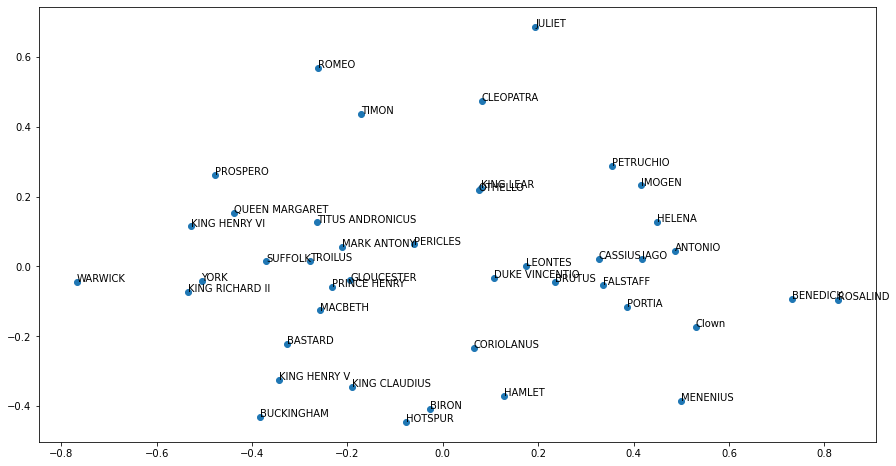

In [76]:
plt.figure(figsize=(15,8))
plt.scatter(character_vectors_pca[:, 0], character_vectors_pca[:, 1])
for i, character in enumerate(character_to_vectors.keys()):
    plt.annotate(character, xy=(character_vectors_pca[i, 0], character_vectors_pca[i, 1]))
plt.savefig("character_word2vec.png")
plt.show()